## **DATA SCIENCE AND BUSINESS ANALYTICS INTERN at TSF #GRIPAPRIL21**
###  By:Teja Karna

## TASK 3: Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
As a business manager, try to find out the weak areas where you can work to make more profit.

## Import Libraries and Dataset

In [17]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
df=pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [2]:
print(df.info())
print()
print(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB
None

17


In [3]:
df.drop_duplicates()
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### EXPLORATORY DATA ANALYSIS
#### Data Visualization

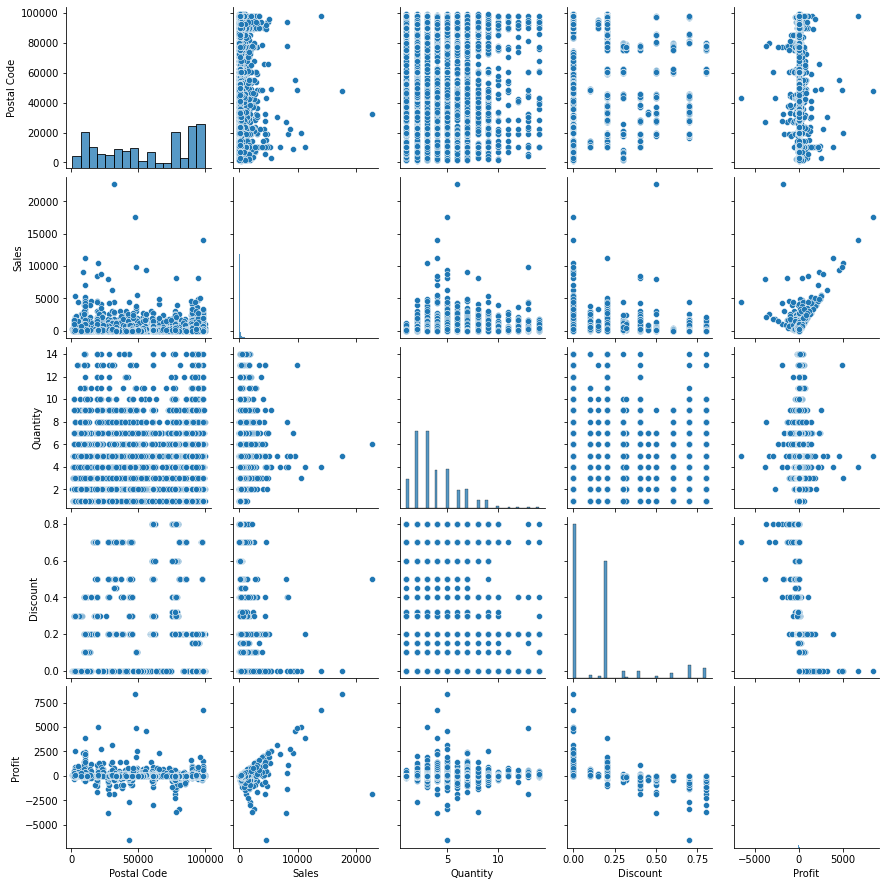

In [4]:
import seaborn as sns 
sns.pairplot(df)

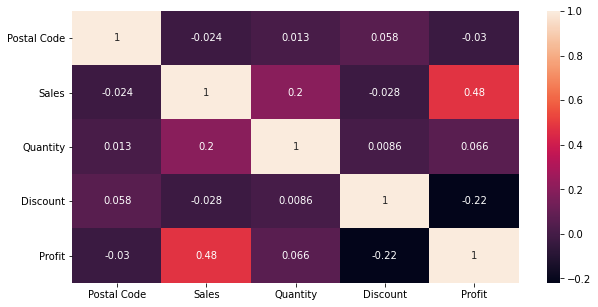

In [5]:
# finding the correlations between the columns and visualising using heatmaps
df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

### Visualizing Ship Modes

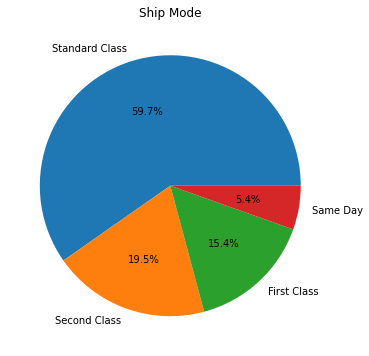

In [6]:
plt.figure(figsize = (6,6))
plt.title('Ship Mode')
plt.pie(df['Ship Mode'].value_counts(), labels=df['Ship Mode'].value_counts().index,autopct='%1.1f%%')
plt.show()

### Visualizing Categories

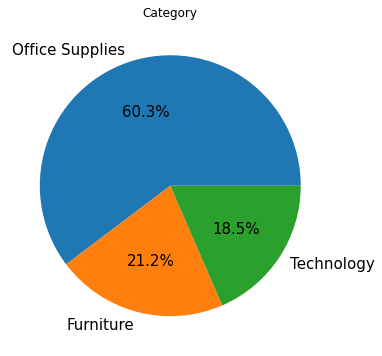

In [7]:
plt.figure(figsize = (6,6))
textprops = {"fontsize":15}
plt.title('Category')
plt.pie(df['Category'].value_counts(), labels=df['Category'].value_counts().index,autopct='%1.1f%%',textprops = textprops)
plt.show()

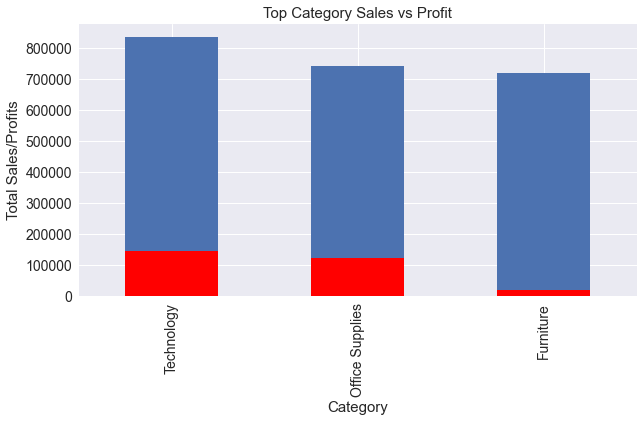

In [8]:
cs = df.groupby("Category").Sales.sum().nlargest(n=100)
cp = df.groupby("Category").Profit.sum().nlargest(n=100)

# plotting to see it visually
plt.style.use('seaborn')
cs.plot(kind = 'bar',figsize = (10,5),fontsize = 14)
cp.plot(kind = 'bar',figsize = (10,5),fontsize = 14,color='red')
plt.xlabel('Category',fontsize = 15)
plt.ylabel('Total Sales/Profits',fontsize = 15)
plt.title("Top Category Sales vs Profit",fontsize = 15)
plt.show()

### Visualizing the Sales vs Profits in different Sub-Categories

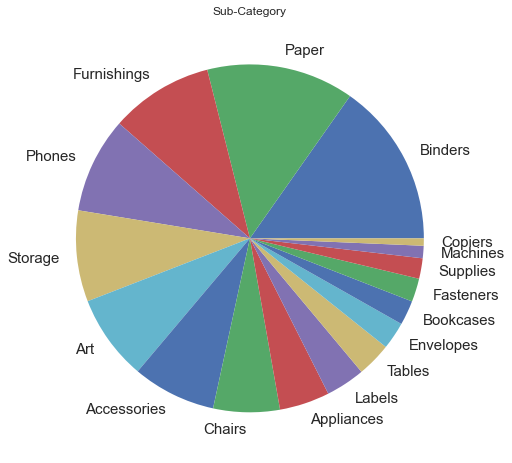

In [9]:
plt.figure(figsize = (8,8))
textprops = {"fontsize":15}
plt.title('Sub-Category')
plt.pie(df['Sub-Category'].value_counts(), labels=df['Sub-Category'].value_counts().index,textprops = textprops)
plt.show()

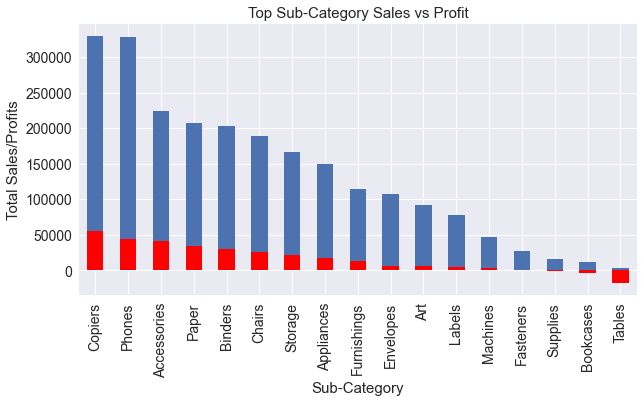

In [10]:
scs = df.groupby("Sub-Category").Sales.sum().nlargest(n = 100)
scp = df.groupby("Sub-Category").Profit.sum().nlargest(n = 100)

# plotting to see it visually
plt.style.use('seaborn')
scs.plot(kind = 'bar',figsize = (10,5),fontsize = 14)
scp.plot(kind = 'bar',figsize = (10,5),fontsize = 14, color = 'red')
plt.xlabel('Sub-Category',fontsize = 15)
plt.ylabel('Total Sales/Profits',fontsize = 15)
plt.title("Top Sub-Category Sales vs Profit",fontsize = 15)
plt.show()


<AxesSubplot:xlabel='Sub-Category'>

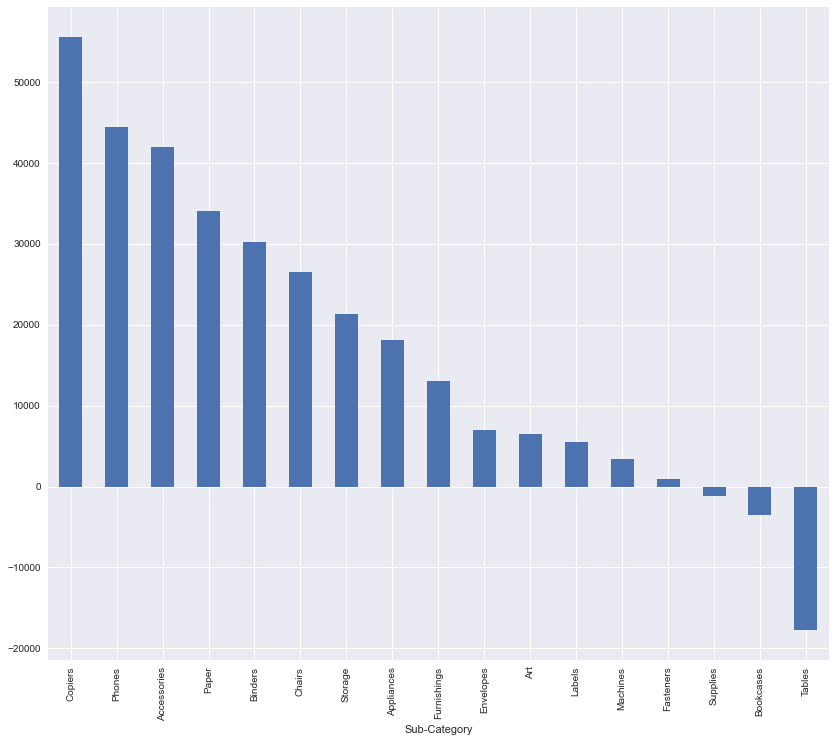

In [11]:
plt.figure(figsize=(14,12))
statewise = df.groupby(['Sub-Category'])['Profit'].sum().nlargest(50)
statewise.plot.bar()

The above graph clearly shows that Copiers and Phones have the highest sales and profit and tables has negative profit

### Visualizing the Sales vs Profits in different Regions

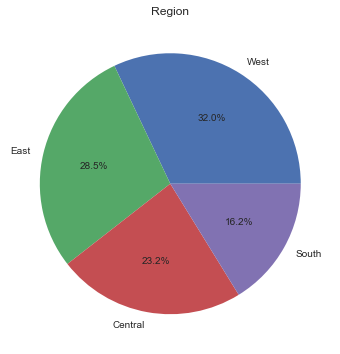

In [12]:
plt.figure(figsize = (6,6))
plt.title('Region')
plt.pie(df['Region'].value_counts(), labels=df['Region'].value_counts().index,autopct='%1.1f%%')
plt.show()

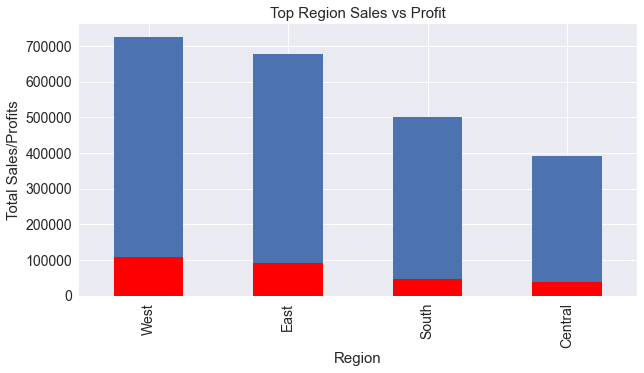

In [13]:
rs = df.groupby("Region").Sales.sum().nlargest(n=100)
rp = df.groupby("Region").Profit.sum().nlargest(n=100)

# plotting to see it visually
plt.style.use('seaborn')
rs.plot(kind = 'bar',figsize = (10,5),fontsize = 14)
rp.plot(kind = 'bar',figsize = (10,5),fontsize = 14,color='red')
plt.xlabel('Region',fontsize = 15)
plt.ylabel('Total Sales/Profits',fontsize = 15)
plt.title("Top Region Sales vs Profit",fontsize = 15)
plt.show()

### Visualising the Sales vs Profits in different states

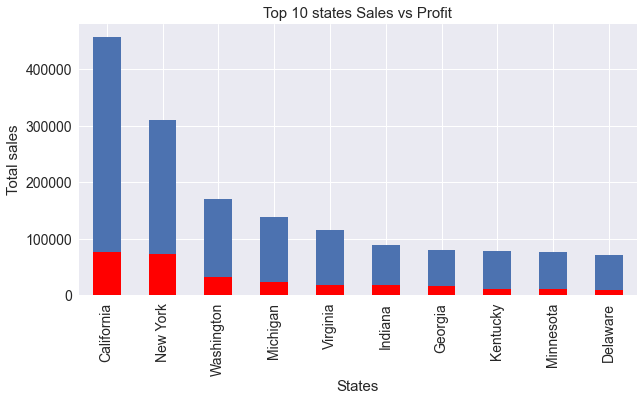

In [14]:
ts = df.groupby("State").Sales.sum().nlargest(n=10)
tp= df.groupby("State").Profit.sum().nlargest(n = 10)

plt.style.use('seaborn')
ts.plot(kind = 'bar',figsize = (10,5),fontsize = 14)
tp.plot(kind = 'bar',figsize = (10,5),fontsize = 14, color = 'red')
plt.xlabel('States',fontsize = 15)
plt.ylabel('Total sales',fontsize = 15)
plt.title("Top 10 states Sales vs Profit",fontsize = 15)
plt.show()

<AxesSubplot:xlabel='State'>

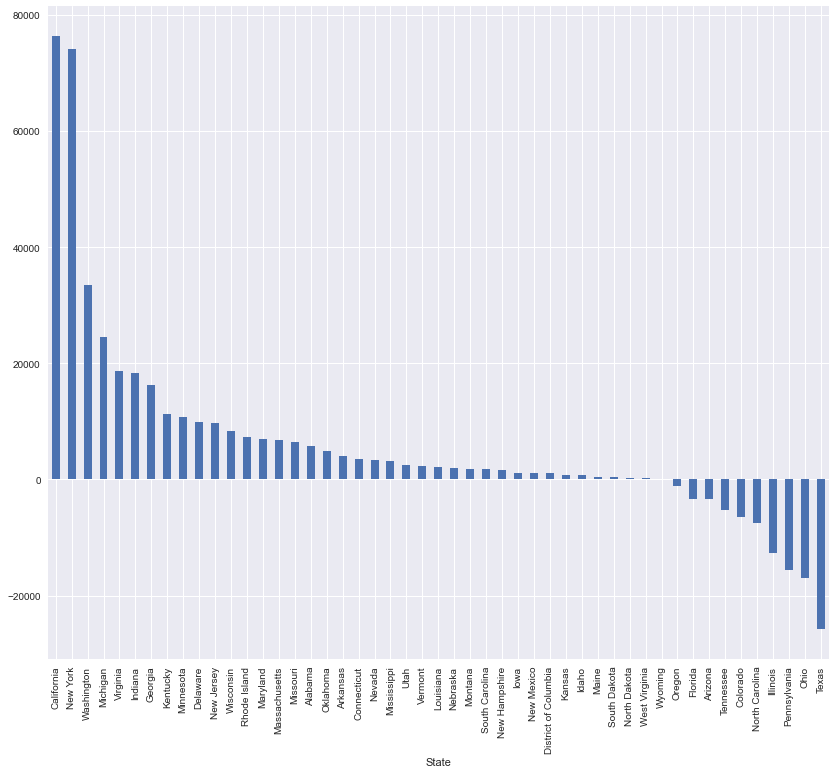

In [15]:
plt.figure(figsize=(14,12))
statewise = df.groupby(['State'])['Profit'].sum().nlargest(50)
statewise.plot.bar() 

The above graph clearly shows that California and New york have the highest sales and profit

### Checking the interdependency of Sales,Profits and Discounts

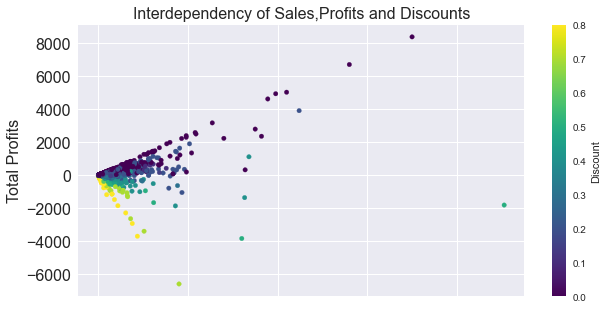

In [16]:
plt.style.use('seaborn')
df.plot(kind = "scatter",figsize = (10,5), x = "Sales", y= "Profit", c = "Discount", s = 20,fontsize = 16, colormap = "viridis")
plt.ylabel('Total Profits',fontsize = 16)
plt.title("Interdependency of Sales,Profits and Discounts",fontsize = 16)

plt.show()

### Conclusion
Increase sales more in the east as profit is more.

We should concentrate on the states like 'New York' and 'California' to make more profits.

The final graph clearly shows that if we give more Discount on our products sales increases but profit decreases.

## Task3 :Completed Exploratory Data Analysis - Retail  #GRIPAPRIL21
### The Sparks Foundation